In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load the data
file_path = r'C:\Users\eissa\dd\source code\Full_clustered_Data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data
data.head()

,patient_label,hip_knee_angle,knee_ankle_angle,hip_knee_angle_r,knee_ankle_angle_r,left_shoulder_elbow_angle,left_elbow_wrist_angle,right_shoulder_elbow_angle,right_elbow_wrist_angle,Target
0,OAW01-bottom,100.617182,89.490668,79.066984,103.316816,84.065700,78.285235,112.684778,102.451913,0
1,OAW01-bottom,101.571657,91.298998,78.928803,110.164716,80.677259,82.082049,112.253828,102.499115,0
2,OAW01-bottom,101.903664,94.777712,77.878505,116.895911,79.217586,85.281872,111.248798,102.271423,0
3,OAW01-bottom,102.051940,97.171604,78.653020,115.105438,78.933753,86.116666,109.465157,101.082634,0
4,OAW01-bottom,102.586880,99.157460,80.071540,102.232837,78.902353,85.511526,108.892788,99.226450,0


In [ ]:
# Selecting multiple features
X = data[['hip_knee_angle', 'knee_ankle_angle', 'hip_knee_angle_r', 'knee_ankle_angle_r', 'left_shoulder_elbow_angle', 'left_elbow_wrist_angle', 'right_shoulder_elbow_angle', 'right_elbow_wrist_angle']]
y = data['Target']


In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [33]:
from sklearn.ensemble import RandomForestClassifier


# Define hyperparameters to tune
param_grid_rf = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

# Initialize Random Forest model
rf = RandomForestClassifier()

# Grid search with cross-validation
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

# Use the best model
best_rf = grid_search_rf.best_estimator_

# Make predictions
best_rf_pred = best_rf.predict(X_test_scaled)

# Calculate accuracy
best_rf_accuracy = accuracy_score(y_test, best_rf_pred)
print("Accuracy of Random Forest after hyperparameter tuning:", round(best_rf_accuracy, 2))


Best Hyperparameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy of Random Forest after hyperparameter tuning: 0.89


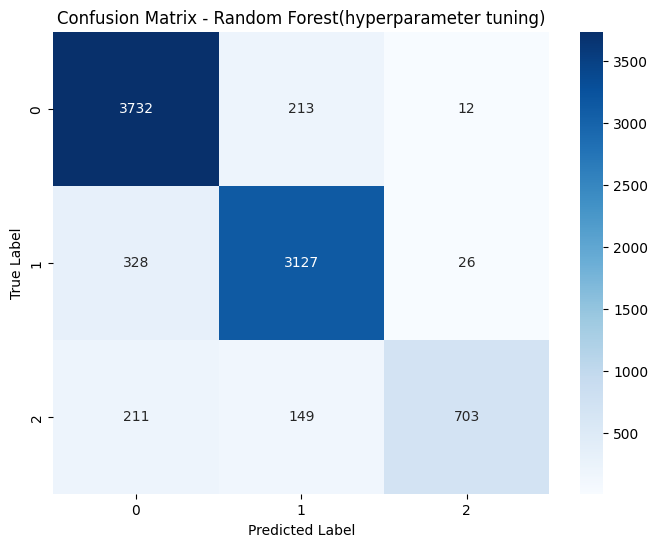

Precision: 0.89
Recall: 0.89


In [41]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix for best_rf
best_rf_conf_matrix = confusion_matrix(y_test, best_rf_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(best_rf_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest(hyperparameter tuning)')
plt.show()

# Calculate precision
precision = round(precision_score(y_test, best_rf_pred, average='weighted'), 2)
print("Precision:", precision)

# Calculate recall
recall = round(recall_score(y_test, best_rf_pred, average='weighted'), 2)
print("Recall:", recall)

In [ ]:
# Define hyperparameters to tune
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11],
                  'weights': ['uniform', 'distance'],
                  'metric': ['euclidean', 'manhattan']}

# Initialize KNN model
knn = KNeighborsClassifier()

# Grid search with cross-validation
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params_knn = grid_search_knn.best_params_
print("Best Hyperparameters for K-Nearest Neighbors:", best_params_knn)

# Use the best model
best_knn = grid_search_knn.best_estimator_

# Make predictions
best_knn_pred = best_knn.predict(X_test_scaled)

# Calculate accuracy
best_knn_accuracy = accuracy_score(y_test, best_knn_pred)
print("Accuracy of K-Nearest Neighbors after hyperparameter tuning:", round(best_knn_accuracy, 2))

Best Hyperparameters for K-Nearest Neighbors: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy of K-Nearest Neighbors after hyperparameter tuning: 0.92


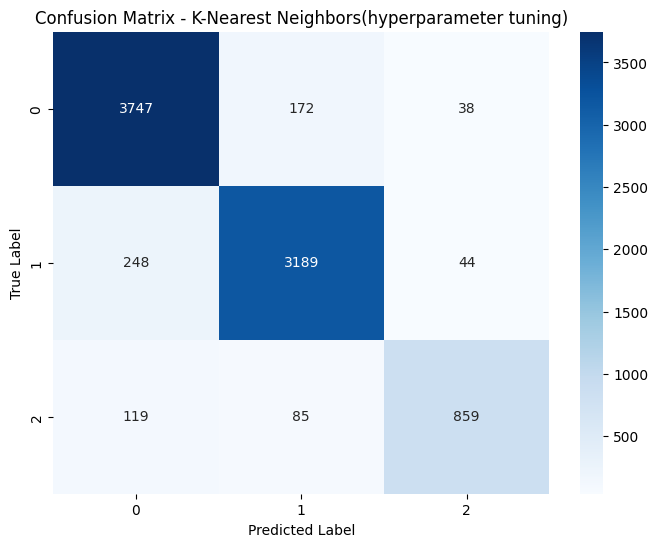

Precision: 0.92
Recall: 0.92


In [42]:
# Generate confusion matrix for best_knn
best_knn_conf_matrix = confusion_matrix(y_test, best_knn_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(best_knn_conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=best_knn.classes_, 
            yticklabels=best_knn.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - K-Nearest Neighbors(hyperparameter tuning)')
plt.show()

# Calculate precision
precision = round(precision_score(y_test, best_knn_pred, average='weighted'), 2)
print("Precision:", precision)

# Calculate recall
recall = round(recall_score(y_test, best_knn_pred, average='weighted'), 2)
print("Recall:", recall)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize Logistic Regression model
logreg = LogisticRegression()

# Grid search with cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model
best_logreg = grid_search.best_estimator_

# Make predictions
best_logreg_pred = best_logreg.predict(X_test_scaled)

# Calculate accuracy
best_logreg_accuracy = accuracy_score(y_test, best_logreg_pred)
print("Accuracy of Logistic Regression after hyperparameter tuning:", round(best_logreg_accuracy, 3), "%")

Best Hyperparameters: {'C': 1}
Accuracy of Logistic Regression after hyperparameter tuning: 0.522 %


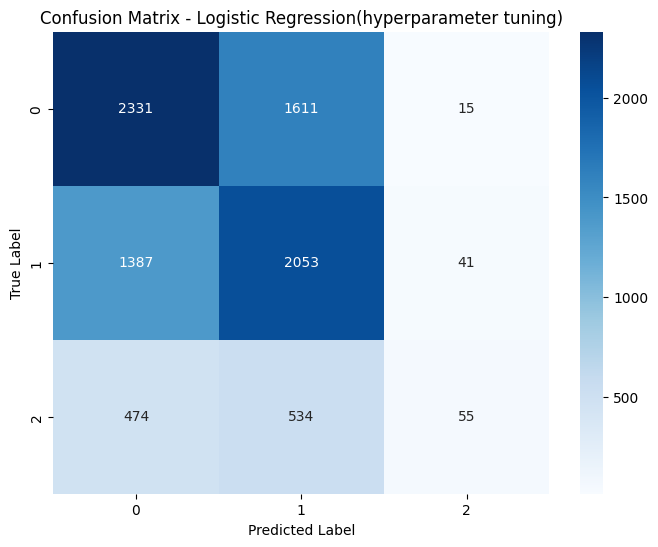

Precision: 0.52
Recall: 0.52


In [43]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix for best_logreg
best_logreg_conf_matrix = confusion_matrix(y_test, best_logreg_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(best_logreg_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression(hyperparameter tuning)')
plt.show()

# Calculate precision
precision = round(precision_score(y_test, best_logreg_pred, average='weighted'), 2)
print("Precision:", precision)

# Calculate recall
recall = round(recall_score(y_test, best_logreg_pred, average='weighted'), 2)
print("Recall:", recall)

In [ ]:

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Define hyperparameters to tune
param_grid_et = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

# Convert the target variable to a single class
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize Extra Trees model
et = ExtraTreesClassifier()

# Grid search with cross-validation
grid_search_et = GridSearchCV(et, param_grid_et, cv=5, scoring='accuracy')
grid_search_et.fit(X_train_scaled, y_train_encoded)

# Get the best hyperparameters
best_params_et = grid_search_et.best_params_
print("Best Hyperparameters for Extra Trees:", best_params_et)

# Use the best model
best_et = grid_search_et.best_estimator_

# Make predictions
best_et_pred = best_et.predict(X_test_scaled)

# Calculate accuracy
best_et_accuracy = accuracy_score(y_test_encoded, best_et_pred)
print("Accuracy of Extra Trees after hyperparameter tuning:", round(best_et_accuracy, 3))

Best Hyperparameters for Extra Trees: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy of Extra Trees after hyperparameter tuning: 0.905


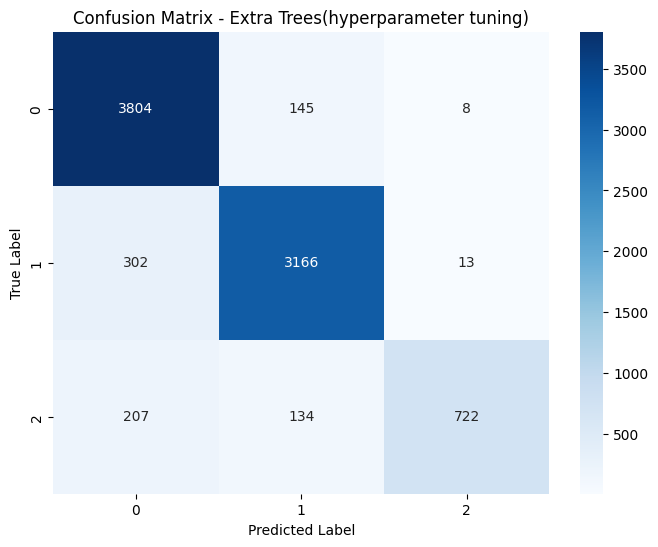

Precision: 0.91
Recall: 0.905


In [44]:
# Generate confusion matrix for best_et
best_et_conf_matrix = confusion_matrix(y_test_encoded, best_et_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(best_et_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Extra Trees(hyperparameter tuning)')
plt.show()

# Calculate precision
precision = round(precision_score(y_test_encoded, best_et_pred, average='weighted'), 2)
print("Precision:", precision)

# Calculate recall
recall = round(recall_score(y_test_encoded, best_et_pred, average='weighted'), 3)
print("Recall:", recall)

In [ ]:
# Define hyperparameters to tune
param_grid_xgb = {'n_estimators': [50, 100, 200],
                  'max_depth': [3, 6, 9],
                  'learning_rate': [0.1, 0.01, 0.001]}

# Initialize XGBoost model
xgb = XGBClassifier(tree_method='hist', device='cuda')  # Specify histogram method and CUDA device for acceleration

# Grid search with cross-validation
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params_xgb = grid_search_xgb.best_params_
print("Best Hyperparameters for XGBoost:", best_params_xgb)

# Use the best model
best_xgb = grid_search_xgb.best_estimator_

# Make predictions
best_xgb_pred = best_xgb.predict(X_test_scaled)

# Calculate accuracy
best_xgb_accuracy = accuracy_score(y_test, best_xgb_pred)
print("Accuracy of XGBoost after hyperparameter tuning:", round(best_xgb_accuracy, 2))

In [38]:
import joblib

# Load the saved XGBoost model from file
#loaded_xgb_model = joblib.load('best_xgb_model.pkl')
# Load the saved XGBoost model from file
loaded_xgb_model = joblib.load(r"C:\Users\eissa\dd\source code\best_xgb_model.pkl")

# Make predictions using the loaded model
loaded_xgb_pred = loaded_xgb_model.predict(X_test_scaled)

# Calculate accuracy
loaded_xgb_accuracy = accuracy_score(y_test, loaded_xgb_pred)
print("Accuracy of loaded XGBoost model:", round(loaded_xgb_accuracy, 2))


Accuracy of loaded XGBoost model: 0.87


c:\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:33:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\gbm\gbtree.cc:385: Changing updater from `grow_gpu_hist` to `grow_quantile_histmaker`.
  warnings.warn(smsg, UserWarning)
c:\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:33:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


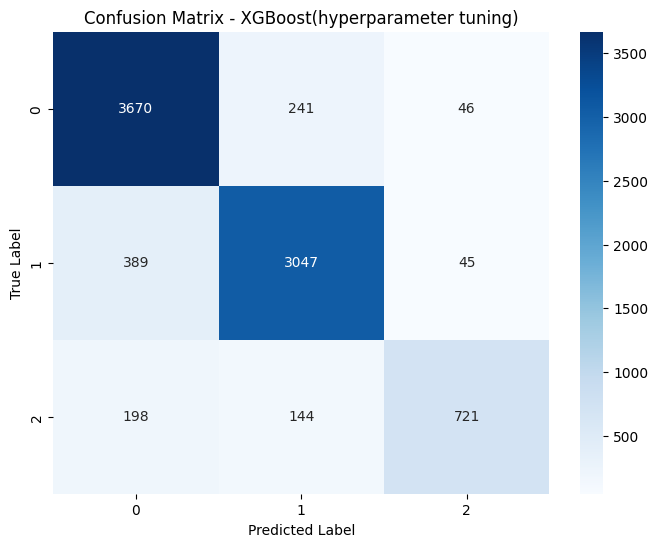

Precision: 0.88
Recall: 0.87


In [40]:
# Make predictions using the loaded model
loaded_xgb_pred = loaded_xgb_model.predict(X_test_scaled)

# Generate confusion matrix for XGBoost
xgb_conf_matrix = confusion_matrix(y_test, loaded_xgb_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=loaded_xgb_model.classes_, 
            yticklabels=loaded_xgb_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost(hyperparameter tuning)')
plt.show()

# Calculate precision
precision = round(precision_score(y_test, loaded_xgb_pred, average='weighted'), 2)
print("Precision:", precision)

# Calculate recall
recall = round(recall_score(y_test, loaded_xgb_pred, average='weighted'), 2)
print("Recall:", recall)